In [1]:
# Imports

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
folder = "D:\ProgrammingBigFiles\Kaggle\Facial Keypoints Recognition\\"

In [2]:
# Loads database

traindb = pd.read_csv(folder + "training.csv")
testdb = pd.read_csv(folder + "test.csv")
id_lookup_table = pd.read_csv(folder + "IdLookupTable.csv")
sampleSubmission = pd.read_csv(folder + "SampleSubmission.csv")

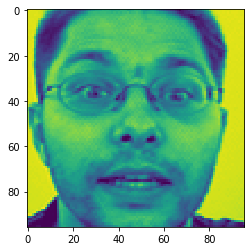

In [3]:
# Preprocessing

traindb = traindb.dropna()

x_train, y_train = traindb.iloc[:, -1], traindb.iloc[:, :-1]
x_final = testdb = testdb.iloc[:, -1]

del traindb
del testdb

x_train = x_train.apply(lambda img: np.fromstring(img, dtype=int, sep=' '))
x_final = x_final.apply(lambda img: np.fromstring(img, dtype=int, sep=' '))

x_train = np.vstack(x_train)
x_final = np.vstack(x_final)
x_train = x_train.reshape(-1, 96, 96, 1) / 255.0
x_final = x_final.reshape(-1, 96, 96, 1) / 255.0

# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state = 343)

plot.imshow(x_final[0][:, :, 0])

featureIndex = {}
for i in range(len(y_train.columns)):
    featureIndex[y_train.columns[i]] = i

In [4]:
# Sample model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu", input_shape = (96, 96, 1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(512, activation = "relu"),
#     tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(30)
])
model.summary()
model.compile(optimizer = "adam", loss = "mse", metrics=["mae", "accuracy"])
# ^ rememer to chance loss and accuracy
model.fit(x_train, y_train, epochs = 500, shuffle = True, validation_split = 0.01)

W0804 22:39:24.123322 19500 deprecation.py:506] From C:\Users\Nelson Gomes Neto\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        80        
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0

Epoch 27/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 10.8861 - mean_absolute_error: 2.5154 - acc: 0.6841 - val_loss: 4.3375 - val_mean_absolute_error: 1.5172 - val_acc: 0.5455
Epoch 28/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 12.0168 - mean_absolute_error: 2.6561 - acc: 0.6752 - val_loss: 5.3797 - val_mean_absolute_error: 1.6885 - val_acc: 0.5455
Epoch 29/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 11.4783 - mean_absolute_error: 2.5883 - acc: 0.6832 - val_loss: 3.8532 - val_mean_absolute_error: 1.5312 - val_acc: 0.5455
Epoch 30/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 10.5032 - mean_absolute_error: 2.4682 - acc: 0.6922 - val_loss: 4.5423 - val_mean_absolute_error: 1.5494 - val_acc: 0.6364
Epoch 31/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 10.6287 - mean_absolute_error: 2.4915 - acc: 0.6898 - val_loss: 3.4330 - val_mean_absolute_error: 1.3943 - v

2118/2118 [==============================] - 3s 1ms/sample - loss: 7.3025 - mean_absolute_error: 2.0528 - acc: 0.7403 - val_loss: 3.8100 - val_mean_absolute_error: 1.5926 - val_acc: 0.6818
Epoch 68/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 7.4936 - mean_absolute_error: 2.0764 - acc: 0.7380 - val_loss: 4.5410 - val_mean_absolute_error: 1.6452 - val_acc: 0.7727
Epoch 69/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 7.8580 - mean_absolute_error: 2.1392 - acc: 0.7408 - val_loss: 3.0790 - val_mean_absolute_error: 1.3383 - val_acc: 0.6364
Epoch 70/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 8.5078 - mean_absolute_error: 2.2207 - acc: 0.7380 - val_loss: 3.0064 - val_mean_absolute_error: 1.3005 - val_acc: 0.7273
Epoch 71/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 7.6118 - mean_absolute_error: 2.1014 - acc: 0.7446 - val_loss: 3.0124 - val_mean_absolute_error: 1.3895 - val_acc: 0.6818
Epo

2118/2118 [==============================] - 3s 1ms/sample - loss: 6.9516 - mean_absolute_error: 2.0134 - acc: 0.7691 - val_loss: 2.5315 - val_mean_absolute_error: 1.1840 - val_acc: 0.6818
Epoch 108/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.4737 - mean_absolute_error: 1.9476 - acc: 0.7602 - val_loss: 2.8673 - val_mean_absolute_error: 1.2911 - val_acc: 0.5909
Epoch 109/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 7.0666 - mean_absolute_error: 2.0317 - acc: 0.7587 - val_loss: 3.1074 - val_mean_absolute_error: 1.3373 - val_acc: 0.5909
Epoch 110/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 7.1077 - mean_absolute_error: 2.0329 - acc: 0.7644 - val_loss: 4.8279 - val_mean_absolute_error: 1.7155 - val_acc: 0.6364
Epoch 111/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.9519 - mean_absolute_error: 1.9902 - acc: 0.7644 - val_loss: 2.7580 - val_mean_absolute_error: 1.2319 - val_acc: 0.6818

2118/2118 [==============================] - 3s 1ms/sample - loss: 6.8969 - mean_absolute_error: 2.0073 - acc: 0.7823 - val_loss: 3.1582 - val_mean_absolute_error: 1.3301 - val_acc: 0.7273
Epoch 148/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.9417 - mean_absolute_error: 2.0175 - acc: 0.7635 - val_loss: 2.4904 - val_mean_absolute_error: 1.1859 - val_acc: 0.6818
Epoch 149/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.3593 - mean_absolute_error: 1.9247 - acc: 0.7724 - val_loss: 2.9503 - val_mean_absolute_error: 1.2765 - val_acc: 0.6364
Epoch 150/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.6056 - mean_absolute_error: 1.9557 - acc: 0.7757 - val_loss: 3.6663 - val_mean_absolute_error: 1.4658 - val_acc: 0.6818
Epoch 151/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.1304 - mean_absolute_error: 1.8858 - acc: 0.7658 - val_loss: 4.3392 - val_mean_absolute_error: 1.6536 - val_acc: 0.7273

2118/2118 [==============================] - 3s 1ms/sample - loss: 6.0253 - mean_absolute_error: 1.8646 - acc: 0.7866 - val_loss: 2.2111 - val_mean_absolute_error: 1.1332 - val_acc: 0.8182
Epoch 188/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.0744 - mean_absolute_error: 1.8792 - acc: 0.7814 - val_loss: 2.8664 - val_mean_absolute_error: 1.2635 - val_acc: 0.8182
Epoch 189/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.7566 - mean_absolute_error: 1.8299 - acc: 0.7767 - val_loss: 4.5286 - val_mean_absolute_error: 1.6172 - val_acc: 0.6364
Epoch 190/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.4161 - mean_absolute_error: 1.9445 - acc: 0.7776 - val_loss: 5.7695 - val_mean_absolute_error: 1.9786 - val_acc: 0.7727
Epoch 191/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.4880 - mean_absolute_error: 1.9456 - acc: 0.7767 - val_loss: 3.0512 - val_mean_absolute_error: 1.3111 - val_acc: 0.7727

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.6754 - mean_absolute_error: 1.8244 - acc: 0.7871 - val_loss: 2.6559 - val_mean_absolute_error: 1.2051 - val_acc: 0.5909
Epoch 228/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.8610 - mean_absolute_error: 1.8408 - acc: 0.7871 - val_loss: 2.4298 - val_mean_absolute_error: 1.1665 - val_acc: 0.5909
Epoch 229/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.8271 - mean_absolute_error: 1.8338 - acc: 0.8050 - val_loss: 2.6604 - val_mean_absolute_error: 1.2157 - val_acc: 0.6364
Epoch 230/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.9242 - mean_absolute_error: 1.8655 - acc: 0.8050 - val_loss: 2.4573 - val_mean_absolute_error: 1.1760 - val_acc: 0.8182
Epoch 231/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.6300 - mean_absolute_error: 1.8080 - acc: 0.7757 - val_loss: 2.7000 - val_mean_absolute_error: 1.2392 - val_acc: 0.6364

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.8967 - mean_absolute_error: 1.8593 - acc: 0.7890 - val_loss: 2.2191 - val_mean_absolute_error: 1.1343 - val_acc: 0.5909
Epoch 268/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.8190 - mean_absolute_error: 1.8390 - acc: 0.7960 - val_loss: 3.5670 - val_mean_absolute_error: 1.4394 - val_acc: 0.6364
Epoch 269/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.9402 - mean_absolute_error: 1.8533 - acc: 0.8008 - val_loss: 3.0690 - val_mean_absolute_error: 1.3157 - val_acc: 0.7273
Epoch 270/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5921 - mean_absolute_error: 1.8050 - acc: 0.7913 - val_loss: 2.0923 - val_mean_absolute_error: 1.1123 - val_acc: 0.5909
Epoch 271/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5905 - mean_absolute_error: 1.8103 - acc: 0.7890 - val_loss: 2.3186 - val_mean_absolute_error: 1.1334 - val_acc: 0.5909

2118/2118 [==============================] - 3s 1ms/sample - loss: 6.1068 - mean_absolute_error: 1.8971 - acc: 0.7904 - val_loss: 2.4658 - val_mean_absolute_error: 1.1743 - val_acc: 0.6364
Epoch 308/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.6559 - mean_absolute_error: 1.8160 - acc: 0.8017 - val_loss: 2.4123 - val_mean_absolute_error: 1.2165 - val_acc: 0.6818
Epoch 309/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5416 - mean_absolute_error: 1.8011 - acc: 0.7984 - val_loss: 2.6827 - val_mean_absolute_error: 1.2056 - val_acc: 0.6364
Epoch 310/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.8439 - mean_absolute_error: 1.8520 - acc: 0.7875 - val_loss: 2.7773 - val_mean_absolute_error: 1.2658 - val_acc: 0.7273
Epoch 311/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.7421 - mean_absolute_error: 1.8291 - acc: 0.7932 - val_loss: 2.1514 - val_mean_absolute_error: 1.0924 - val_acc: 0.6818

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5978 - mean_absolute_error: 1.7991 - acc: 0.7993 - val_loss: 2.1370 - val_mean_absolute_error: 1.1488 - val_acc: 0.7273
Epoch 348/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5168 - mean_absolute_error: 1.7992 - acc: 0.8093 - val_loss: 2.4338 - val_mean_absolute_error: 1.1789 - val_acc: 0.8182
Epoch 349/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.5469 - mean_absolute_error: 1.7991 - acc: 0.8064 - val_loss: 2.6263 - val_mean_absolute_error: 1.2243 - val_acc: 0.6364
Epoch 350/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.4194 - mean_absolute_error: 1.7726 - acc: 0.7960 - val_loss: 1.9936 - val_mean_absolute_error: 1.0720 - val_acc: 0.6818
Epoch 351/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.4253 - mean_absolute_error: 1.7883 - acc: 0.8074 - val_loss: 2.4414 - val_mean_absolute_error: 1.1565 - val_acc: 0.6818

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.1940 - mean_absolute_error: 1.7388 - acc: 0.8026 - val_loss: 2.3661 - val_mean_absolute_error: 1.1519 - val_acc: 0.7727absolute_error: 1.7330 - acc: 
Epoch 388/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.4604 - mean_absolute_error: 1.7764 - acc: 0.8196 - val_loss: 2.1772 - val_mean_absolute_error: 1.1310 - val_acc: 0.7727
Epoch 389/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.1276 - mean_absolute_error: 1.7213 - acc: 0.8008 - val_loss: 3.1359 - val_mean_absolute_error: 1.3676 - val_acc: 0.7273
Epoch 390/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.3764 - mean_absolute_error: 1.7560 - acc: 0.8026 - val_loss: 2.2910 - val_mean_absolute_error: 1.1280 - val_acc: 0.7727
Epoch 391/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.0962 - mean_absolute_error: 1.7259 - acc: 0.7932 - val_loss: 2.0869 - val_mean_absolute_e

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.0898 - mean_absolute_error: 1.7149 - acc: 0.8248 - val_loss: 2.0845 - val_mean_absolute_error: 1.0966 - val_acc: 0.7273
Epoch 428/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.3800 - mean_absolute_error: 1.7697 - acc: 0.8168 - val_loss: 4.5334 - val_mean_absolute_error: 1.6804 - val_acc: 0.7273
Epoch 429/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.6216 - mean_absolute_error: 1.8091 - acc: 0.8102 - val_loss: 2.1912 - val_mean_absolute_error: 1.1162 - val_acc: 0.7273
Epoch 430/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 4.9999 - mean_absolute_error: 1.7051 - acc: 0.7979 - val_loss: 2.9299 - val_mean_absolute_error: 1.3113 - val_acc: 0.7273
Epoch 431/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.3222 - mean_absolute_error: 1.7491 - acc: 0.8012 - val_loss: 2.1157 - val_mean_absolute_error: 1.1007 - val_acc: 0.7727

2118/2118 [==============================] - 3s 1ms/sample - loss: 5.1750 - mean_absolute_error: 1.7376 - acc: 0.8041 - val_loss: 3.7145 - val_mean_absolute_error: 1.5158 - val_acc: 0.7273
Epoch 468/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 6.0604 - mean_absolute_error: 1.8890 - acc: 0.8159 - val_loss: 4.3759 - val_mean_absolute_error: 1.6830 - val_acc: 0.7727
Epoch 469/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.3091 - mean_absolute_error: 1.7670 - acc: 0.8239 - val_loss: 2.5551 - val_mean_absolute_error: 1.1945 - val_acc: 0.6818
Epoch 470/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.3715 - mean_absolute_error: 1.7716 - acc: 0.7984 - val_loss: 2.4381 - val_mean_absolute_error: 1.1587 - val_acc: 0.6364
Epoch 471/500
2118/2118 [==============================] - 3s 1ms/sample - loss: 5.1485 - mean_absolute_error: 1.7362 - acc: 0.8026 - val_loss: 1.8835 - val_mean_absolute_error: 1.0199 - val_acc: 0.7727

In [5]:
# Predict

y_predict = model.predict(x_final)
ans = []
for line in id_lookup_table.iterrows():
    ans += [y_predict[line[1]["ImageId"] - 1, featureIndex[line[1]["FeatureName"]]]]
submission = pd.DataFrame({"RowId": list(range(1, len(id_lookup_table) + 1)), "Location": ans})
submission.to_csv("submission.csv", index = False)